In [1]:
import json
import pandas as pd
import os
import sqlite3
from sqlite3 import Error
from statistics import mean
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
directory_with_files = '../data'
db_name = './test.db'

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))



In [2]:
countries ={'AW': 'ABW',
 'AF': 'AFG',
 'AO': 'AGO',
 'AI': 'AIA',
 'AX': 'ALA',
 'AL': 'ALB',
 'AD': 'AND',
 'AE': 'ARE',
 'AR': 'ARG',
 'AM': 'ARM',
 'AS': 'ASM',
 'AQ': 'ATA',
 'TF': 'ATF',
 'AG': 'ATG',
 'AU': 'AUS',
 'AT': 'AUT',
 'AZ': 'AZE',
 'BI': 'BDI',
 'BE': 'BEL',
 'BJ': 'BEN',
 'BQ': 'BES',
 'BF': 'BFA',
 'BD': 'BGD',
 'BG': 'BGR',
 'BH': 'BHR',
 'BS': 'BHS',
 'BA': 'BIH',
 'BL': 'BLM',
 'BY': 'BLR',
 'BZ': 'BLZ',
 'BM': 'BMU',
 'BO': 'BOL',
 'BR': 'BRA',
 'BB': 'BRB',
 'BN': 'BRN',
 'BT': 'BTN',
 'BV': 'BVT',
 'BW': 'BWA',
 'CF': 'CAF',
 'CA': 'CAN',
 'CC': 'CCK',
 'CH': 'CHE',
 'CL': 'CHL',
 'CN': 'CHN',
 'CI': 'CIV',
 'CM': 'CMR',
 'CD': 'COD',
 'CG': 'COG',
 'CK': 'COK',
 'CO': 'COL',
 'KM': 'COM',
 'CV': 'CPV',
 'CR': 'CRI',
 'CU': 'CUB',
 'CW': 'CUW',
 'CX': 'CXR',
 'KY': 'CYM',
 'CY': 'CYP',
 'CZ': 'CZE',
 'DE': 'DEU',
 'DJ': 'DJI',
 'DM': 'DMA',
 'DK': 'DNK',
 'DO': 'DOM',
 'DZ': 'DZA',
 'EC': 'ECU',
 'EG': 'EGY',
 'ER': 'ERI',
 'EH': 'ESH',
 'ES': 'ESP',
 'EE': 'EST',
 'ET': 'ETH',
 'FI': 'FIN',
 'FJ': 'FJI',
 'FK': 'FLK',
 'FR': 'FRA',
 'FO': 'FRO',
 'FM': 'FSM',
 'GA': 'GAB',
 'GB': 'GBR',
 'GE': 'GEO',
 'GG': 'GGY',
 'GH': 'GHA',
 'GI': 'GIB',
 'GN': 'GIN',
 'GP': 'GLP',
 'GM': 'GMB',
 'GW': 'GNB',
 'GQ': 'GNQ',
 'GR': 'GRC',
 'GD': 'GRD',
 'GL': 'GRL',
 'GT': 'GTM',
 'GF': 'GUF',
 'GU': 'GUM',
 'GY': 'GUY',
 'HK': 'HKG',
 'HM': 'HMD',
 'HN': 'HND',
 'HR': 'HRV',
 'HT': 'HTI',
 'HU': 'HUN',
 'ID': 'IDN',
 'IM': 'IMN',
 'IN': 'IND',
 'IO': 'IOT',
 'IE': 'IRL',
 'IR': 'IRN',
 'IQ': 'IRQ',
 'IS': 'ISL',
 'IL': 'ISR',
 'IT': 'ITA',
 'JM': 'JAM',
 'JE': 'JEY',
 'JO': 'JOR',
 'JP': 'JPN',
 'KZ': 'KAZ',
 'KE': 'KEN',
 'KG': 'KGZ',
 'KH': 'KHM',
 'KI': 'KIR',
 'KN': 'KNA',
 'KR': 'KOR',
 'KW': 'KWT',
 'LA': 'LAO',
 'LB': 'LBN',
 'LR': 'LBR',
 'LY': 'LBY',
 'LC': 'LCA',
 'LI': 'LIE',
 'LK': 'LKA',
 'LS': 'LSO',
 'LT': 'LTU',
 'LU': 'LUX',
 'LV': 'LVA',
 'MO': 'MAC',
 'MF': 'MAF',
 'MA': 'MAR',
 'MC': 'MCO',
 'MD': 'MDA',
 'MG': 'MDG',
 'MV': 'MDV',
 'MX': 'MEX',
 'MH': 'MHL',
 'MK': 'MKD',
 'ML': 'MLI',
 'MT': 'MLT',
 'MM': 'MMR',
 'ME': 'MNE',
 'MN': 'MNG',
 'MP': 'MNP',
 'MZ': 'MOZ',
 'MR': 'MRT',
 'MS': 'MSR',
 'MQ': 'MTQ',
 'MU': 'MUS',
 'MW': 'MWI',
 'MY': 'MYS',
 'YT': 'MYT',
 'NA': 'NAM',
 'NC': 'NCL',
 'NE': 'NER',
 'NF': 'NFK',
 'NG': 'NGA',
 'NI': 'NIC',
 'NU': 'NIU',
 'NL': 'NLD',
 'NO': 'NOR',
 'NP': 'NPL',
 'NR': 'NRU',
 'NZ': 'NZL',
 'OM': 'OMN',
 'PK': 'PAK',
 'PA': 'PAN',
 'PN': 'PCN',
 'PE': 'PER',
 'PH': 'PHL',
 'PW': 'PLW',
 'PG': 'PNG',
 'PL': 'POL',
 'PR': 'PRI',
 'KP': 'PRK',
 'PT': 'PRT',
 'PY': 'PRY',
 'PS': 'PSE',
 'PF': 'PYF',
 'QA': 'QAT',
 'RE': 'REU',
 'RO': 'ROU',
 'RU': 'RUS',
 'RW': 'RWA',
 'SA': 'SAU',
 'SD': 'SDN',
 'SN': 'SEN',
 'SG': 'SGP',
 'GS': 'SGS',
 'SH': 'SHN',
 'SJ': 'SJM',
 'SB': 'SLB',
 'SL': 'SLE',
 'SV': 'SLV',
 'SM': 'SMR',
 'SO': 'SOM',
 'PM': 'SPM',
 'RS': 'SRB',
 'SS': 'SSD',
 'ST': 'STP',
 'SR': 'SUR',
 'SK': 'SVK',
 'SI': 'SVN',
 'SE': 'SWE',
 'SZ': 'SWZ',
 'SX': 'SXM',
 'SC': 'SYC',
 'SY': 'SYR',
 'TC': 'TCA',
 'TD': 'TCD',
 'TG': 'TGO',
 'TH': 'THA',
 'TJ': 'TJK',
 'TK': 'TKL',
 'TM': 'TKM',
 'TL': 'TLS',
 'TO': 'TON',
 'TT': 'TTO',
 'TN': 'TUN',
 'TR': 'TUR',
 'TV': 'TUV',
 'TW': 'TWN',
 'TZ': 'TZA',
 'UG': 'UGA',
 'UA': 'UKR',
 'UM': 'UMI',
 'UY': 'URY',
 'US': 'USA',
 'UZ': 'UZB',
 'VA': 'VAT',
 'VC': 'VCT',
 'VE': 'VEN',
 'VG': 'VGB',
 'VI': 'VIR',
 'VN': 'VNM',
 'VU': 'VUT',
 'WF': 'WLF',
 'WS': 'WSM',
 'YE': 'YEM',
 'ZA': 'ZAF',
 'ZM': 'ZMB',
 'ZW': 'ZWE'}

In [4]:
def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    return conn

def convert(label):
    ddict = {'negative':-1, 'neutral':0, 'positive':1}
    return ddict[label]

def get_margin(a3, df_clean_upd):
    try:
        margin = df_clean_upd[df_clean_upd['alpha_3']==a3]['sentiment_int'].values[0]
    except:
        margin =0
    return margin



In [5]:

conn = create_connection(db_name)

2.6.0


In [6]:
query = '''
SELECT tweet_id, tweet_geo_id, full_name, country, country_code, sentiment_label, timestamp_ms, tweets.tweet_type AS type
FROM tweets_geo, tweets
WHERE tweet_id = tweet_geo_id AND (type = 'original' OR type = 'reply')
'''
df = pd.read_sql_query(query, conn)



In [7]:
df

,tweet_id,tweet_geo_id,full_name,country,country_code,sentiment_label,timestamp_ms,type
0,1131173142414712832,1131173142414712832,"Ferno, Lombardia",Italy,IT,negative,1558527667989,reply
1,1131173455473201153,1131173455473201153,"Cuauhtémoc, Distrito Federal",México,MX,neutral,1558527742628,original
2,1131174183814258688,1131174183814258688,"South Aegean, Greece",Hellas,GR,positive,1558527916278,reply
3,1131175392482594816,1131175392482594816,Ronald Reagan Washington National Airport (DCA),Estados Unidos,US,neutral,1558528204447,original
4,1131178683320983563,1131178683320983563,"el Prat de Llobregat, Espanya",Spain,ES,neutral,1558528989044,original
...,...,...,...,...,...,...,...,...
154148,1244695724220190721,1244695724220190721,"Leeds, England",United Kingdom,GB,negative,1585593560639,original
154149,1244696076940083201,1244696076940083201,"Moca, Dominican Republic",Dominican Republic,DO,negative,1585593644734,reply
154150,1244696128441978882,1244696128441978882,"Colesville, MD",United States,US,neutral,1585593657013,original
154151,1244696155851837441,1244696155851837441,"Haarlemmermeer, Nederland",Nederland,NL,neutral,1585593663548,original


In [13]:
df['sentiment_int'] = df['sentiment_label'].apply(convert)
df_grouped = df.groupby('country_code').mean()[['sentiment_int']]
df_clean = df_grouped.reset_index().drop(0)
df_clean.drop(df_clean[df_clean['country_code']=='XK'].index, inplace=True)
df_test = df.groupby('country_code').count().reset_index()
df_clean['alpha_3']= df_clean['country_code'].apply(lambda x: countries[x])
df_clean_upd = df_clean[df_clean['country_code'].isin(df_test[df_test['tweet_id']>20]['country_code'].drop(0).values.tolist())]
world['margin'] = world['iso_a3'].apply(get_margin, args=(df_clean_upd,))

C:\Users\20221317\AppData\Local\Temp\ipykernel_8008\3802518323.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('country_code').mean()[['sentiment_int']]


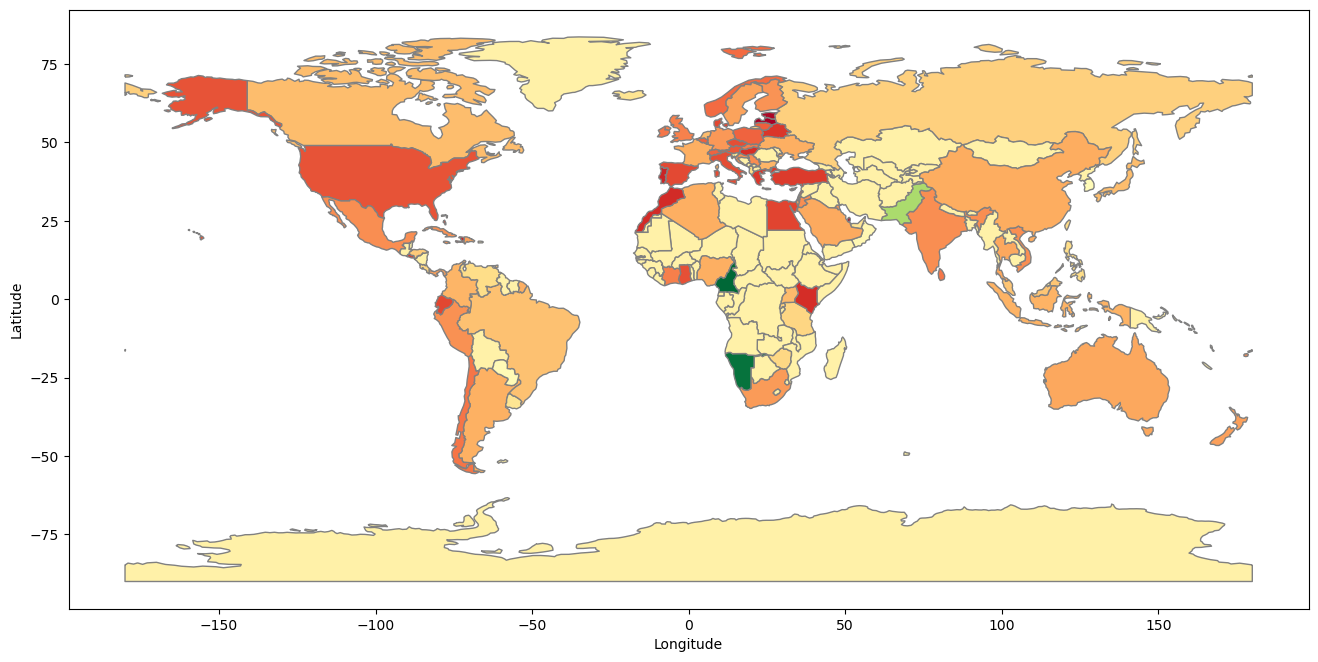

In [14]:
ax2 = world.plot(column='margin',  figsize=(16,16), edgecolor=u'gray', cmap='RdYlGn')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

plt.show()

In [ ]:
world

In [12]:
df_clean[df_clean['country_code']=='XK']

,country_code,sentiment_int
198,XK,-0.217391
